In [100]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [101]:
import pandas as pd

# Đọc bộ dữ liệu từ Google Drive
df = pd.read_csv("/content/dataset.csv")

In [102]:
import pandas as pd
import seaborn as sns
import numpy as np
import datetime
import matplotlib
import numpy as np
import pickle
import matplotlib.pyplot as plt

# Xem dữ liệu
print(df.head())


           id             date     price  bedrooms  bathrooms  sqft_living  \
0  7972604345  20140519T000000  137000.0       3.0       1.00          950   
1  4365200186  20140606T000000  253500.0       2.0       1.00          810   
2  2722049077  20140828T000000  299500.0       3.0       1.75         1810   
3   221049191  20150428T000000  329500.0       3.0       2.50         2120   
4  7228500610  20150330T000000       NaN       2.0       1.00         1070   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0    7620.0     1.0           0   0.0  ...      6         950            0.0   
1    4800.0     1.0           0   0.0  ...      7         810            0.0   
2   34500.0     1.0           0   0.0  ...      8        1230          580.0   
3   22482.0     1.0           0   0.0  ...      7        1360          760.0   
4    5280.0     1.0           0   0.0  ...      6        1070            0.0   

   yr_built  yr_renovated  zipcode      lat     lo

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21000 entries, 0 to 20999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21000 non-null  int64  
 1   date           21000 non-null  object 
 2   price          20998 non-null  float64
 3   bedrooms       20985 non-null  float64
 4   bathrooms      20988 non-null  float64
 5   sqft_living    21000 non-null  int64  
 6   sqft_lot       20997 non-null  float64
 7   floors         21000 non-null  float64
 8   waterfront     21000 non-null  int64  
 9   view           20996 non-null  float64
 10  condition      21000 non-null  int64  
 11  grade          21000 non-null  int64  
 12  sqft_above     21000 non-null  int64  
 13  sqft_basement  20997 non-null  float64
 14  yr_built       21000 non-null  int64  
 15  yr_renovated   21000 non-null  int64  
 16  zipcode        21000 non-null  int64  
 17  lat            21000 non-null  float64
 18  long  

In [104]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7972604345,20140519T000000,137000.0,3.0,1.00,950,7620.0,1.0,0,0.0,...,6,950,0.0,1954,0,98106,47.5178,-122.346,1260,7620
1,4365200186,20140606T000000,253500.0,2.0,1.00,810,4800.0,1.0,0,0.0,...,7,810,0.0,1948,0,98126,47.5232,-122.375,1240,7740
2,2722049077,20140828T000000,299500.0,3.0,1.75,1810,34500.0,1.0,0,0.0,...,8,1230,580.0,1980,0,98032,47.3707,-122.275,2090,9735
3,221049191,20150428T000000,329500.0,3.0,2.50,2120,22482.0,1.0,0,0.0,...,7,1360,760.0,1979,0,98001,47.3410,-122.265,2330,16016
4,7228500610,20150330T000000,NaN,2.0,1.00,1070,5280.0,1.0,0,0.0,...,6,1070,0.0,1900,0,98122,47.6168,-122.303,1380,2370
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20995,5379800810,20140807T000000,198000.0,2.0,1.00,790,14200.0,1.0,0,0.0,...,7,790,0.0,1951,0,98188,47.4590,-122.285,1430,10000
20996,2909300640,20140723T000000,884744.0,4.0,3.50,4210,9414.0,2.0,0,0.0,...,9,4210,0.0,2001,0,98074,47.6067,-122.022,3950,8880
20997,3826000280,20150429T000000,272000.0,3.0,1.00,1130,8100.0,1.5,0,0.0,...,6,1130,0.0,1934,0,98168,47.4935,-122.306,1080,8100
20998,5502700005,20140625T000000,330000.0,6.0,2.25,3040,28535.0,1.0,0,0.0,...,8,1890,1150.0,1951,0,98030,47.3864,-122.223,1360,8250


**Câu 1 :Xử lý giá trị bị khuyết:**
Bình luận : Kết quả sau khi điền khuyết:

Bộ dữ liệu từ 21000 dòng giảm xuống 20969 dòng

=> Có khoảng 29 ô dữ liệu khuyết

In [105]:
df.dropna(subset=["bedrooms", "bathrooms", "view", "sqft_basement", "sqft_lot"], inplace=True)

In [106]:
# Lọc toàn bộ giá trị trống
df = df.dropna()

In [107]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7972604345,20140519T000000,137000.0,3.0,1.00,950,7620.0,1.0,0,0.0,...,6,950,0.0,1954,0,98106,47.5178,-122.346,1260,7620
1,4365200186,20140606T000000,253500.0,2.0,1.00,810,4800.0,1.0,0,0.0,...,7,810,0.0,1948,0,98126,47.5232,-122.375,1240,7740
2,2722049077,20140828T000000,299500.0,3.0,1.75,1810,34500.0,1.0,0,0.0,...,8,1230,580.0,1980,0,98032,47.3707,-122.275,2090,9735
3,221049191,20150428T000000,329500.0,3.0,2.50,2120,22482.0,1.0,0,0.0,...,7,1360,760.0,1979,0,98001,47.3410,-122.265,2330,16016
5,8141310030,20140730T000000,256703.0,3.0,2.00,1670,4441.0,1.0,0,0.0,...,7,1670,0.0,2014,0,98022,47.1948,-121.975,1670,4622
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20995,5379800810,20140807T000000,198000.0,2.0,1.00,790,14200.0,1.0,0,0.0,...,7,790,0.0,1951,0,98188,47.4590,-122.285,1430,10000
20996,2909300640,20140723T000000,884744.0,4.0,3.50,4210,9414.0,2.0,0,0.0,...,9,4210,0.0,2001,0,98074,47.6067,-122.022,3950,8880
20997,3826000280,20150429T000000,272000.0,3.0,1.00,1130,8100.0,1.5,0,0.0,...,6,1130,0.0,1934,0,98168,47.4935,-122.306,1080,8100
20998,5502700005,20140625T000000,330000.0,6.0,2.25,3040,28535.0,1.0,0,0.0,...,8,1890,1150.0,1951,0,98030,47.3864,-122.223,1360,8250


Câu 2: Loại trực quan biểu đồ thanh
Bình luận:
Biểu đồ thanh trên biến floors cho thấy rằng hầu hết các tòa nhà có 1 hoặc 2 tầng. Có một số ít tòa nhà có 3 tầng , một số ít tòa nhà có 2,5 tầng , một số ít tòa nhà có 1,5 tầng.

Phần lớn các ngôi nhà trong dữ liệu có một tầng (49.42%). Điều này cho thấy rằng hai tầng là số tầng phổ biến nhất cho các ngôi nhà ở khu vực này.


Các ngôi nhà có hai tầng và ba tầng có số lượng tương đương nhau (38.1 và 2.83%). Điều này cho thấy rằng cả một tầng và ba tầng đều là những lựa chọn phổ biến cho các ngôi nhà ở khu vực này.

Ngoài ra có tới 9.35% các ngôi nhà có số tầng là 1.5 và 2.5. Điều này là vô lý vì trong thực tế số tầng của ngôi nhà phải là số nguyên.

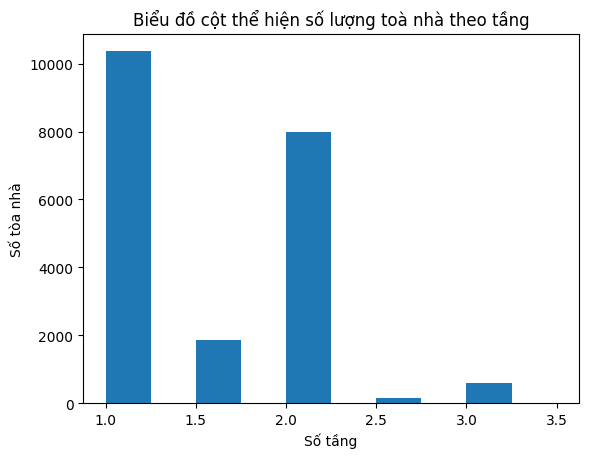

In [108]:
# Tạo biểu đồ thanh
plt.hist(df["floors"])

# Tạo tiêu đề
plt.title("Biểu đồ cột thể hiện số lượng toà nhà theo tầng")
plt.xlabel("Số tầng")
plt.ylabel("Số tòa nhà")
plt.show()



In [109]:
# Tìm tỷ lệ phần số tầng của các ngôi nhà
percentage_1floor = df["floors"].value_counts()[1] / df.shape[0] * 100
percentage_2floor = df["floors"].value_counts()[2] / df.shape[0] * 100
percentage_3floor = df["floors"].value_counts()[3] / df.shape[0] * 100
print(percentage_1floor)
print(percentage_2floor)
print(percentage_3floor)

49.42534217177739
38.103867614097
2.823215222471267


Câu 3:Loại trực quan biểu đồ thanh.
Bình luận : Biểu đồ cột cho thấy rằng có nhiều tòa nhà không có view ra bờ sông hơn tòa nhà có view ra bờ sông. Cụ thể có 20811 toà nhà không có view ra bờ sông và 158 toà nhà có view ra bờ sông.

Tổng số tòa nhà có view ra bờ sông:
158
Tổng số tòa nhà không có view ra bờ sông:
20811


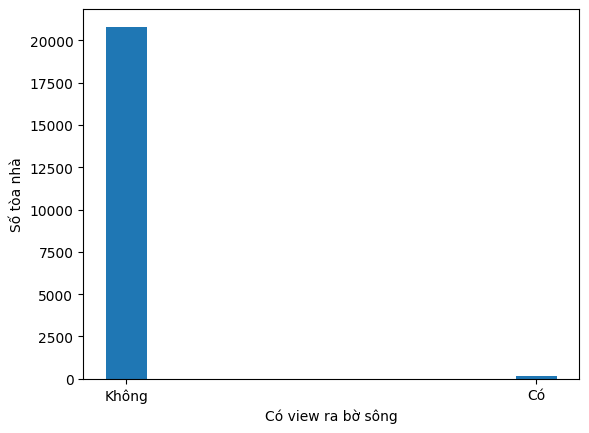

In [110]:
# Vẽ biểu đồ cột
waterfront = df["waterfront"]
plt.bar(["Không", "Có"], [waterfront.value_counts()[0], waterfront.value_counts()[1]], width=0.1)
plt.xlabel("Có view ra bờ sông")
plt.ylabel("Số tòa nhà")

# Tổng số tòa nhà có view ra bờ sông
print("Tổng số tòa nhà có view ra bờ sông:")
print(waterfront.value_counts()[1])

# Tổng số tòa nhà không có view ra bờ sông
print("Tổng số tòa nhà không có view ra bờ sông:")
print(waterfront.value_counts()[0])

plt.show()

Câu 4 : Bình luận : Điều này có nghĩa là giá nhà có xu hướng tăng khi diện tích nhà hoặc diện tích lô đất tăng. Tuy nhiên, hệ số của sqft_living là lớn nhất, cho thấy sqft_living có ảnh hưởng lớn nhất đến giá nhà.

In [111]:
import seaborn as sns

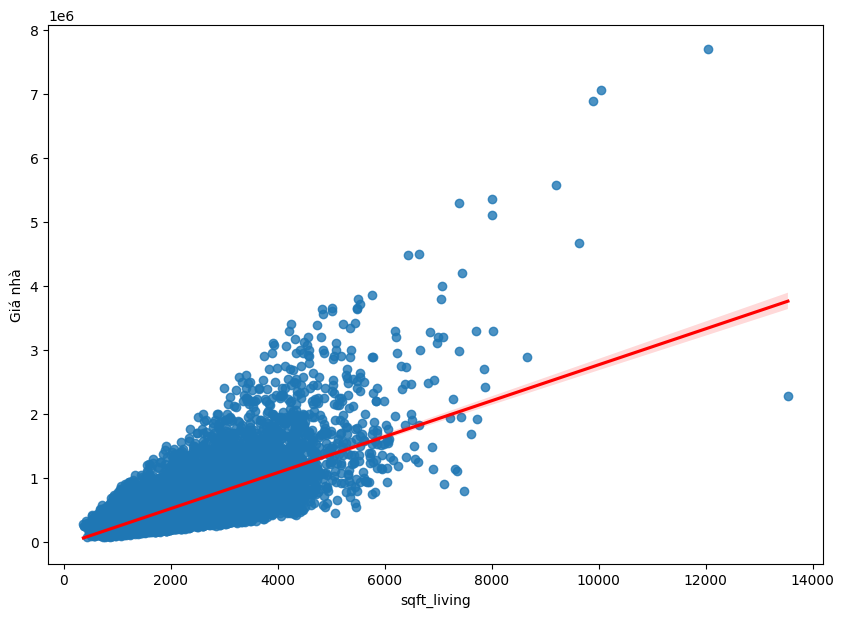

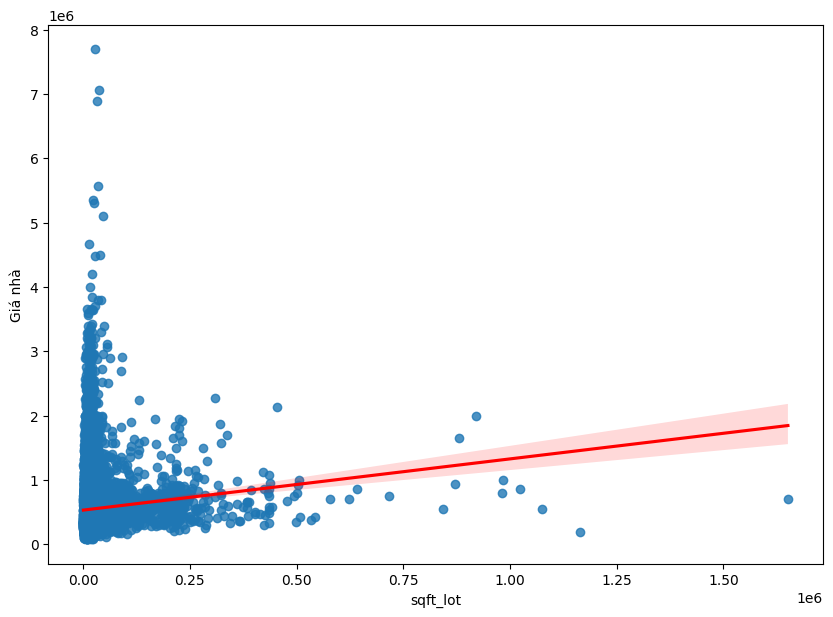

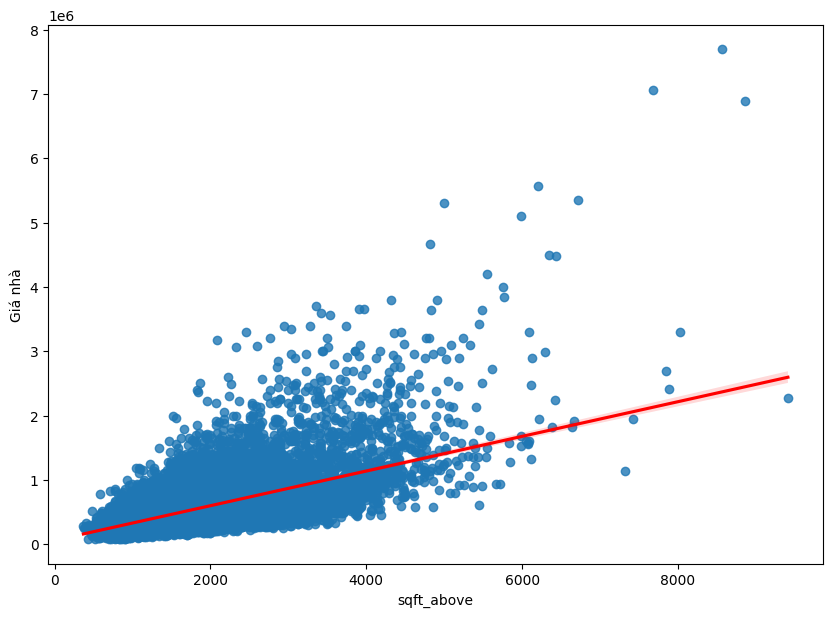

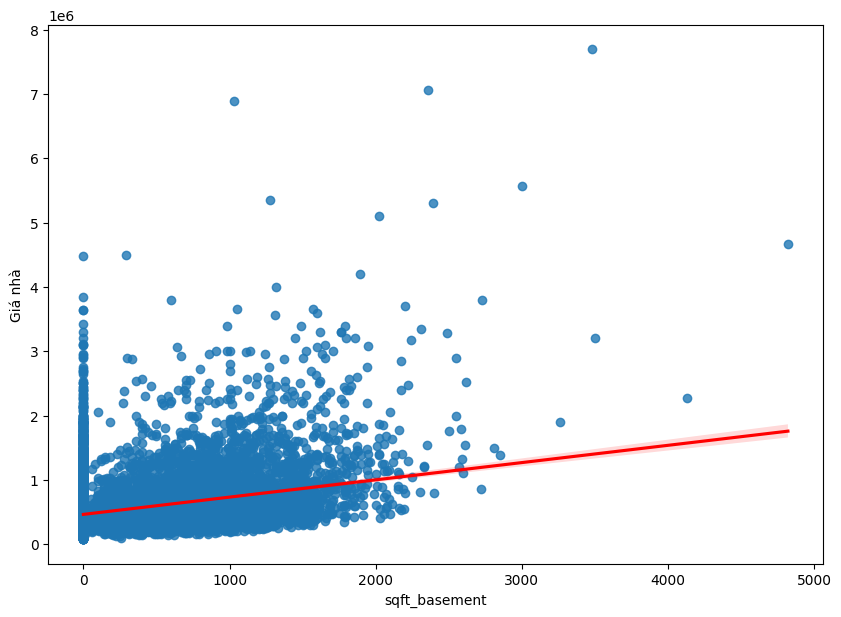

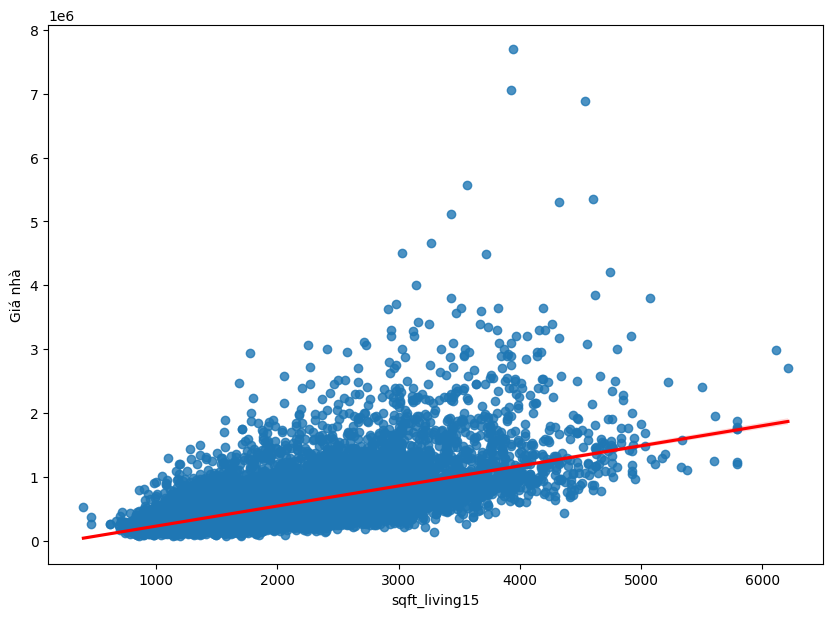

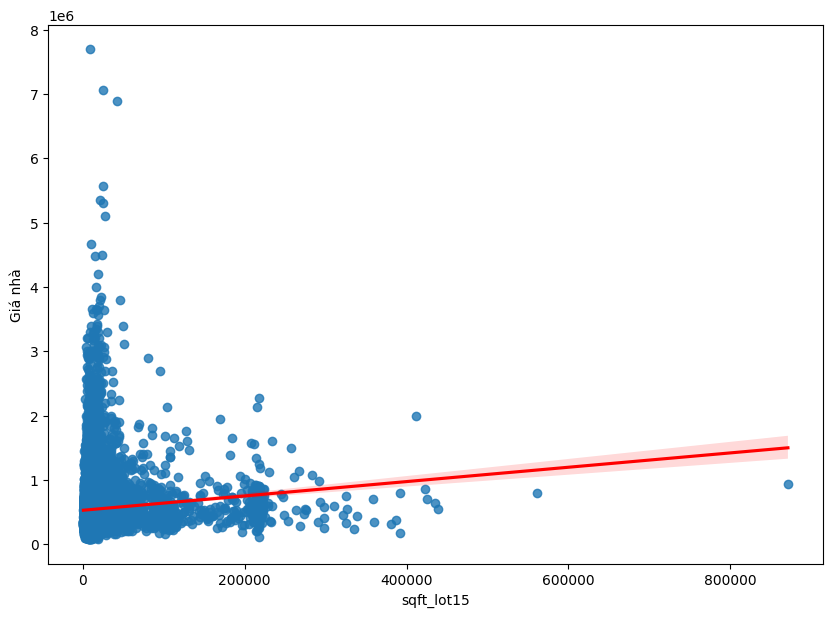

In [112]:
# Vẽ biểu đồ regplot cho từng biến loại diện tích
for col in ["sqft_living", "sqft_lot", "sqft_above", "sqft_basement", "sqft_living15", "sqft_lot15"]:
    plt.figure(figsize=(10, 7))
    sns.regplot(x=df[col], y=df["price"], line_kws={"color": "red"})
    plt.xlabel(col)
    plt.ylabel("Giá nhà")
    plt.show()

Bình Luận các kết quả

sqft_living: Có mối tương quan mạnh nhất với giá nhà. Giá nhà có xu hướng tăng khi diện tích nhà tăng

sqft_lot: Có mối tương quan tương đối mạnh với giá nhà. Giá nhà có xu hướng tăng khi diện tích lô đất tăng.

sqft_above: Có mối tương quan tương đối mạnh với giá nhà. Giá nhà có xu hướng tăng khi diện tích nhà ngoài tầng hầm tăng.

sqft_basement: Có mối tương quan tương đối yếu với giá nhà. Giá nhà có xu hướng tăng khi diện tích tầng hầm tăng.

sqft_living15: Có mối tương quan tương đối mạnh với giá nhà. Giá nhà có xu hướng tăng khi diện tích phòng khách vào năm 2015 tăng.

sqft_lot15: Có mối tương quan tương đối mạnh với giá nhà. Giá nhà có xu hướng tăng khi diện tích lô đất vào năm 2015 tăng.

**Câu 5: Xây dựng mô hình thích hợp dự đoán giá nhà từ các biến sau "floors", "view", "waterfront", "bedrooms", "grade", "bathrooms", "sqft_living15", "sqft_above", "sqft_living", "sqft_basement". (Yêu cầu: phải áp dụng kỹ thuật Pipeline và thang đo thích hợp nhất)**

In [113]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression

# Kiểm tra giá trị thiếu
for col in df.columns:
    print(col, df[col].isnull().sum())

id 0
date 0
price 0
bedrooms 0
bathrooms 0
sqft_living 0
sqft_lot 0
floors 0
waterfront 0
view 0
condition 0
grade 0
sqft_above 0
sqft_basement 0
yr_built 0
yr_renovated 0
zipcode 0
lat 0
long 0
sqft_living15 0
sqft_lot15 0


In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20969 entries, 0 to 20999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             20969 non-null  int64  
 1   date           20969 non-null  object 
 2   price          20969 non-null  float64
 3   bedrooms       20969 non-null  float64
 4   bathrooms      20969 non-null  float64
 5   sqft_living    20969 non-null  int64  
 6   sqft_lot       20969 non-null  float64
 7   floors         20969 non-null  float64
 8   waterfront     20969 non-null  int64  
 9   view           20969 non-null  float64
 10  condition      20969 non-null  int64  
 11  grade          20969 non-null  int64  
 12  sqft_above     20969 non-null  int64  
 13  sqft_basement  20969 non-null  float64
 14  yr_built       20969 non-null  int64  
 15  yr_renovated   20969 non-null  int64  
 16  zipcode        20969 non-null  int64  
 17  lat            20969 non-null  float64
 18  long  

In [115]:
# Xác định các biến cần sử dụng
features = ["floors", "view", "waterfront", "bedrooms", "grade", "bathrooms", "sqft_living15", "sqft_above", "sqft_living", "sqft_basement"]
X = df[features]

In [117]:
from sklearn.model_selection import train_test_split


In [118]:
# Tách dữ liệu thành tập train và test
y = df["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [120]:
from sklearn.pipeline import Pipeline


In [129]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

pipeline = Pipeline([
    ("standardscaler", StandardScaler()),
    ("linearregression", LinearRegression()),
])

In [130]:
# Huấn luyện mô hình
pipeline.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [131]:
# Đánh giá mô hình
y_pred = pipeline.predict(X_test)
print("R-squared:", pipeline.score(X_test, y_test))

R-squared: 0.6024962247539851


Kết quả R-squared là 0.6024962247539851, có nghĩa là mô hình có thể giải thích được 60,24% sự biến thiên của biến mục tiêu. Điều này cho thấy mô hình có độ chính xác tương đối tốt.

Tuy nhiên, kết quả này vẫn có thể được cải thiện bằng cách:

Tăng kích thước của tập dữ liệu: Tập dữ liệu hiện tại có 20969 mẫu dữ liệu. Bạn có thể tăng kích thước của tập dữ liệu bằng cách thu thập thêm dữ liệu hoặc bằng cách sử dụng kỹ thuật tăng cường dữ liệu.

Thử nghiệm với các mô hình khác: Bạn có thể thử nghiệm với các mô hình khác, chẳng hạn như hồi quy Ridge hoặc hồi quy Lasso. Các mô hình này có thể phù hợp hơn với dữ liệu của bạn và có thể cung cấp độ chính xác cao hơn.

Thử nghiệm với các thang đo khác: Bạn có thể thử nghiệm với các thang đo khác cho các biến được cung cấp. Các thang đo khác có thể phù hợp hơn với dữ liệu của bạn và có thể giúp cải thiện độ chính xác của mô hình.

Dưới đây là một số kết luận cụ thể hơn từ kết quả của bạn:

Các biến "floors", "bedrooms", "grade", "bathrooms", "sqft_living15", "sqft_above", "sqft_living", và "sqft_basement" có tác động đáng kể đến giá nhà.
20969
Mô hình có thể dự đoán giá nhà với độ chính xác tương đối tốt, nhưng vẫn có thể được cải thiện.